<a href="https://colab.research.google.com/github/halgendy/c-calculator/blob/main/DS3000.Practicum3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS 3000 - Practicum 3

**Student Name**: Noelle Marcel, HwiJoon Lee, Hazem Algendy, Shreyashi Kalakuntla

**Date**: 04-01-2025

## Selected data set
The dataset that you will work with is called CDC Diabetes Health IndicatorsLinks to an external site. that was obtained from the Behavioral Risk Factor Surveillance System (BRFSS) which is publicly available on the CDC's websiteLinks to an external site.. The purpose of BRFSS is to collect data on various health-related factors. The CDC estimates that millions of Americans are either unaware that they have diabetes or are at risk i.e. they are pre-diabetic. There are many factors that influence the prevalence of diabetes, such as age, location, race, and other social determinants of healthLinks to an external site.. Your objective is to classify the target variable, which indicates whether a patient is diabetic, pre-diabetic, or healthy.
Data: diabetes_012_health_indicators_BRFSS2015.csvDownload diabetes_012_health_indicators_BRFSS2015.csv
Data dictionary: https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicatorsLinks to an external site.
Note: the dataset has three classes: diabetic, pre-diabetic and no diabetes.


## Question 1:

In your own words, formulate the Data Science problem.


Using health indicator data collected from the CDC, the objective is to develop a classification model that can predict a patient's diabetic status. This project addresses a critical public health concern, as the CDC estimates that millions of Americans are either unaware of their diabetic condition. The core challenge is to build a predictive model that analyzes various features including age, location, race, and other social determinants of health to accurately classify an individual's diabetic status. This model would serve as a valuable tool for early intervention and risk assessment in diabetes prevention and management.

## Question 2: Prepare the Data (5 pts)
Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types for ML modeling. This means that you need to identify categorical data, discrete and continuous variables represent them accordingly.
Analyze the data to determine what preprocessing steps are needed to ensure that the following are handled: 1. missing values, 2. invalid values, 3. outliers. Perform the required data preparation steps and justify the approach that is taken to prepare the data for analysis.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

# Basic data exploration
print("Data shape:", df.shape)
print(df.isnull().sum())

binary_vars = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
               'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
               'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

ordinal_vars = ['GenHlth', 'Age', 'Education', 'Income']

continuous_vars = ['BMI', 'MentHlth', 'PhysHlth']

Data shape: (253680, 22)
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


### No Null data found

In [ ]:
print("Min/Max values:")
print(df.describe().loc[['min', 'max']].T)

Min/Max values:
                       min   max
Diabetes_012           0.0   2.0
HighBP                 0.0   1.0
HighChol               0.0   1.0
CholCheck              0.0   1.0
BMI                   12.0  98.0
Smoker                 0.0   1.0
Stroke                 0.0   1.0
HeartDiseaseorAttack   0.0   1.0
PhysActivity           0.0   1.0
Fruits                 0.0   1.0
Veggies                0.0   1.0
HvyAlcoholConsump      0.0   1.0
AnyHealthcare          0.0   1.0
NoDocbcCost            0.0   1.0
GenHlth                1.0   5.0
MentHlth               0.0  30.0
PhysHlth               0.0  30.0
DiffWalk               0.0   1.0
Sex                    0.0   1.0
Age                    1.0  13.0
Education              1.0   6.0
Income                 1.0   8.0


### While there are some extreme values in the dataset (such as BMI of 98), all variables appear to remain within their valid definitional ranges. These statistical outliers represent legitimate data points rather than errors requiring correction.

In [ ]:
# convert related variables to categorical
for var in binary_vars + ordinal_vars:
    df[var] = df[var].astype('category')

for var in continuous_vars:
    df[var] = df[var].astype('int')

# display the data types of the variables
print(df.dtypes)

Diabetes_012            category
HighBP                  category
HighChol                category
CholCheck               category
BMI                        int64
Smoker                  category
Stroke                  category
HeartDiseaseorAttack    category
PhysActivity            category
Fruits                  category
Veggies                 category
HvyAlcoholConsump       category
AnyHealthcare           category
NoDocbcCost             category
GenHlth                 category
MentHlth                   int64
PhysHlth                   int64
DiffWalk                category
Sex                     category
Age                     category
Education               category
Income                  category
dtype: object


## Question 3:(20 points)
Perform exploratory data analysis. Ensure that you analyze the relationships between the various features and the diabetic outcomes. Create visualizations to demonstrate your findings and explain the results. This is a 20pt question and requires detailed analyses and visualizations.

### Counts of Diabetes Types

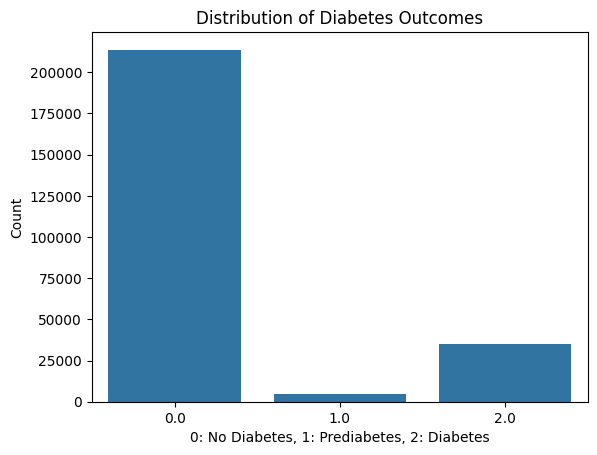

Diabetes Distribution:
Diabetes_012
0.0    0.842
2.0    0.139
1.0    0.018
Name: proportion, dtype: float64


In [ ]:
plt.figure()
sns.countplot(data=df, x='Diabetes_012')
plt.title('Distribution of Diabetes Outcomes')
plt.xlabel('0: No Diabetes, 1: Prediabetes, 2: Diabetes')
plt.ylabel('Count')
plt.show()

print("Diabetes Distribution:")
print(df['Diabetes_012'].value_counts(normalize=True).round(3))

### Explanation
The graph shows a significantly unbalanced distribution across three diabetes categories. The majority of cases, approximately 84.2% are individuals without diabetes. Diabetes cases represent about 13.9% of the total population, while prediabetes cases make up the smallest group at only 1.8% of the sample. This distribution suggests that while diabetes affects a notable minority of the population, the vast majority of individuals in the dataset do not have the condition.

### Visualizations of Contiunous Variables

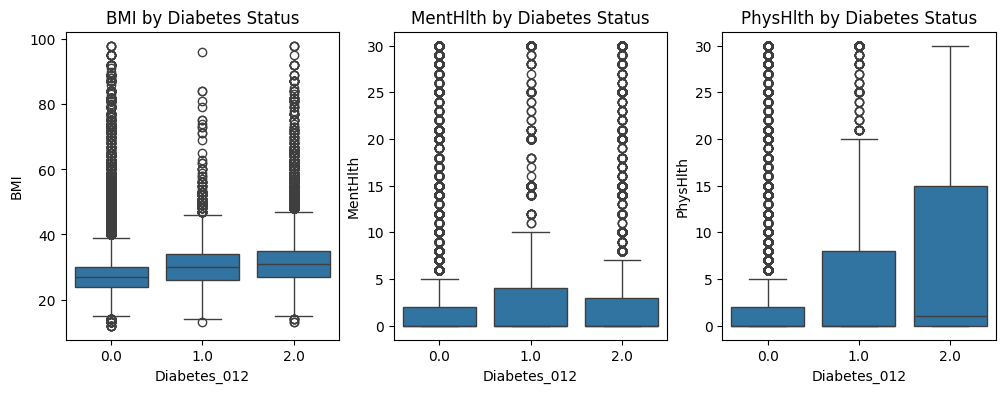

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
continuous_vars = ['BMI', 'MentHlth', 'PhysHlth']
for i, var in enumerate(continuous_vars):
    sns.boxplot(data=df, x='Diabetes_012', y=var, ax=axes[i])
    axes[i].set_title(f'{var} by Diabetes Status')

### Explanation
1. BMI by Diabetes Status:
The plot shows that BMI tends to increase with diabetes progression. People without diabetes have the lowest median BMI, prediabetic individuals show a slightly higher median BMI, and those with diabetes have the highest median BMI. All groups show numerous outliers above their boxes, indicating some individuals with very high BMI values.

2. Mental Health by Diabetes Status:
The distribution of days with mental health issues appears relatively similar across all three groups, though there's a slight increase in the median for prediabetic and diabetic individuals. All groups show many outliers extending to 30 days, suggesting some individuals experience prolonged periods of mental health challenges regardless of diabetes status.

3. Physical Healthby Diabetes Status:
There's a clear trend showing that physical health issues increase with diabetes severity. Those without diabetes report the fewest days of physical health problems, while those with diabetes show the highest median number of days with physical health issues. The box size indicating spread also increases with diabetes severity, suggesting more variability in physical health experiences among diabetic individuals.

### Visualizations of Binary Variables

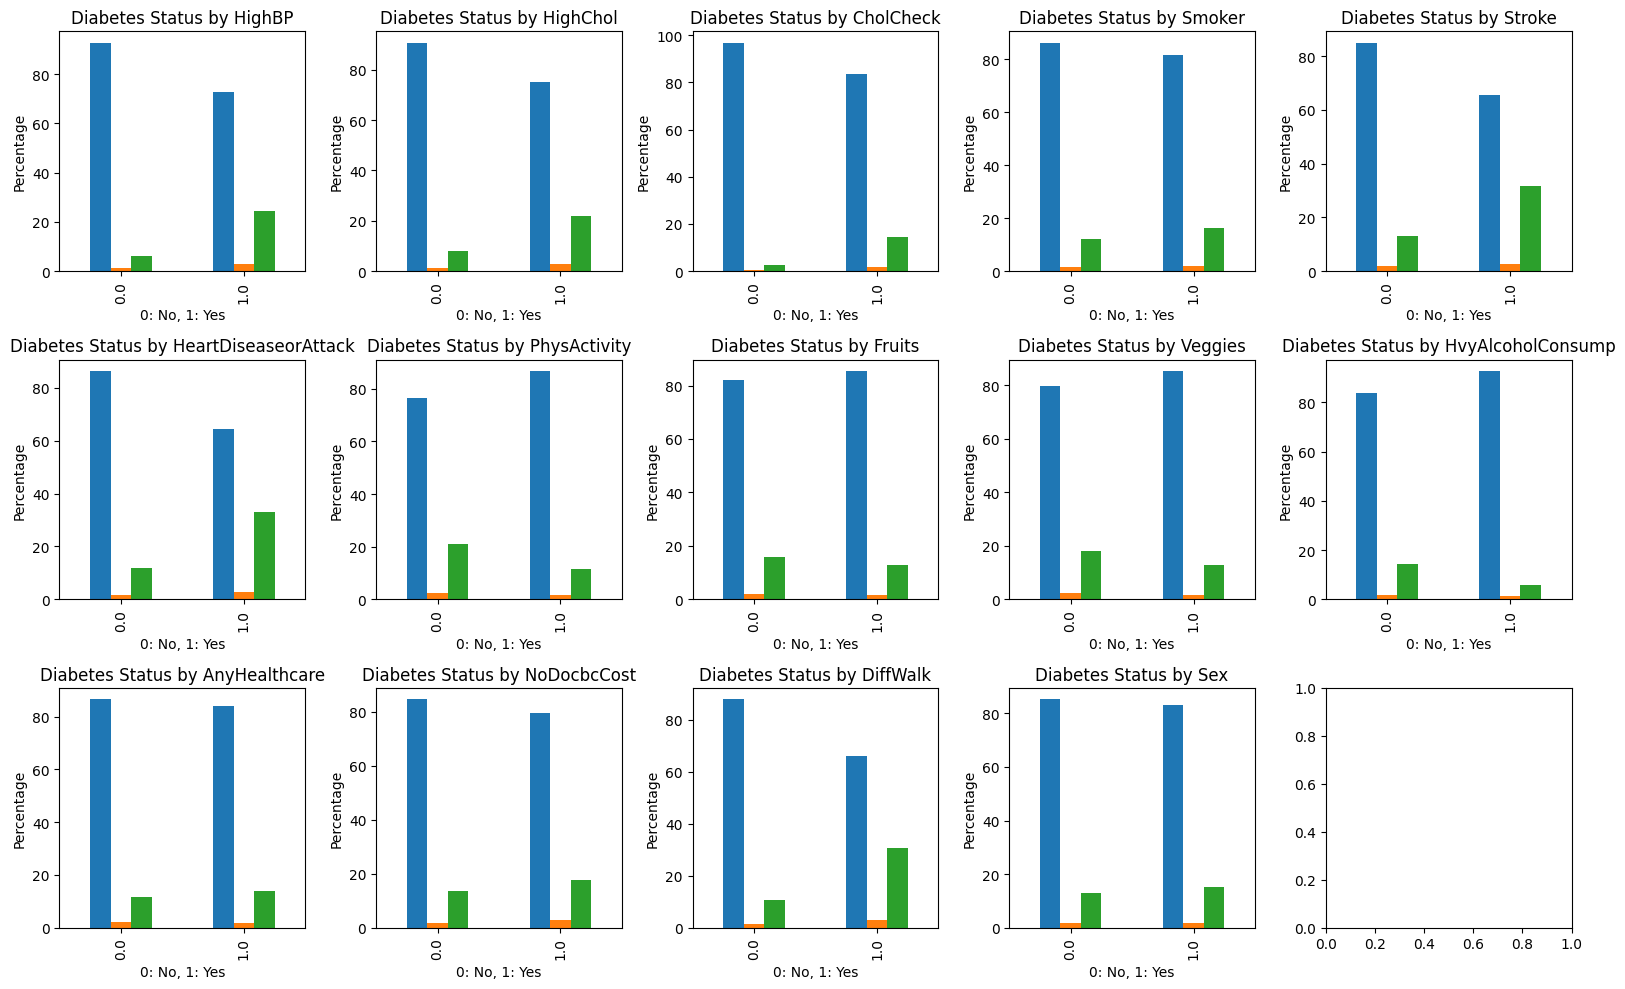

In [ ]:
binary_vars = ['HighBP', 'HighChol', 'CholCheck', 'Smoker',
               'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
               'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

fig, axes = plt.subplots(3, 5, figsize=(16, 10))
axes = axes.ravel()

for i, var in enumerate(binary_vars):
    df_pct = pd.crosstab(df[var], df['Diabetes_012'], normalize='index') * 100
    df_pct.plot(kind='bar', ax=axes[i], legend=False)
    axes[i].set_title(f'Diabetes Status by {var}')
    axes[i].set_xlabel('0: No, 1: Yes')
    axes[i].set_ylabel('Percentage')
plt.tight_layout()
plt.show()

### Explanation
While the dataset contains multiple variables, we will be focusing on the most significant relationships helps identify the strongest predictors and most impactful correlations with diabetes.

1. High Blood Pressure:
There's a striking difference in diabetes rates between those with and without high blood pressure. People with diabetes show a much higher percentage of high blood pressure compared to those without diabetes.

2. Heart Disease/Attack:
One of the most significant correlations shows that individuals with diabetes have a notably higher rate of heart disease or heart attacks (around 35%) compared to those without diabetes (around 15%).

3. Stroke:
There's a clear relationship between diabetes and stroke history. The diabetic group shows a much higher percentage of stroke occurrence compared to the non-diabetic group.

4. Difficulty Walking:
People with diabetes show a markedly higher percentage of walking difficulties compared to those without diabetes, suggesting a strong connection between diabetes and mobility issues.

These relationships suggest that diabetes is strongly associated with cardiovascular problems (high blood pressure, heart disease) and mobility issues.

### Visualizations of Categorical Variables

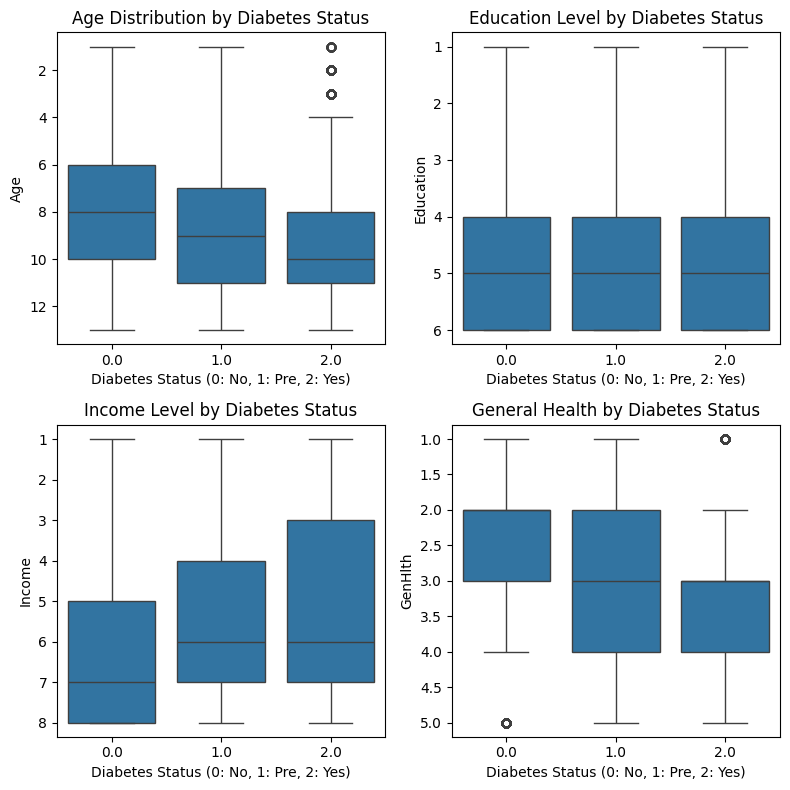

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))

sns.boxplot(data=df, y='Age', x='Diabetes_012', ax=ax1)
ax1.set_title('Age Distribution by Diabetes Status')
ax1.set_xlabel('Diabetes Status (0: No, 1: Pre, 2: Yes)')

sns.boxplot(data=df, y='Education', x='Diabetes_012', ax=ax2)
ax2.set_title('Education Level by Diabetes Status')
ax2.set_xlabel('Diabetes Status (0: No, 1: Pre, 2: Yes)')

sns.boxplot(data=df, y='Income', x='Diabetes_012', ax=ax3)
ax3.set_title('Income Level by Diabetes Status')
ax3.set_xlabel('Diabetes Status (0: No, 1: Pre, 2: Yes)')

sns.boxplot(data=df, y='GenHlth', x='Diabetes_012', ax=ax4)
ax4.set_title('General Health by Diabetes Status')
ax4.set_xlabel('Diabetes Status (0: No, 1: Pre, 2: Yes)')

plt.tight_layout()
plt.show()

### Explanation
1. Age Distribution:
The plot shows a clear age-related pattern where diabetes risk increases with age. People with diabetes and prediabetes tend to be in higher age categories compared to those without diabetes, suggesting age is a significant risk factor for diabetes development.

2. General Health:
There's a striking relationship between diabetes status and general health perception where lower numbers indicate better health. People with diabetes report notably worse general health compared to those without diabetes, indicating a significant impact of diabetes on overall health perception.

3. Income Level:
An interesting inverse relationship appears between income and diabetes status. Those without diabetes tend to have higher income levels (lower numbers on the scale indicate higher income), while those with diabetes show lower income distributions, suggesting potential socioeconomic factors in diabetes prevalence.

4. Education Level:
The education distribution shows relatively minor differences across diabetes status groups, suggesting that educational level may not be as strongly associated with diabetes status as the other factors shown.

These patterns highlight that age and general health have the strongest visible relationships with diabetes status, while socioeconomic factors like income show moderate associations, and education level shows less pronounced differences.

## Question 4a:  (20 points)
Perform significance tests to determine if the patterns that are detected above are statistically significant. Ensure that you discuss at least three patterns and the respective p-values.
Select the features that will be used in the ML models (i.e. your selected features should be based on analytical reasoning that demonstrates their utility for ML modeling. Do not arbitrarily select features.
Note: if you are using correlations, ensure that this is only performed using continuous variables.

## Question 4b: (10 points)
This is an optional challenge question. Its purpose is to identify new features that can be included in the ML modeling below.

Perform ONE of the following
(1) Feature engineering: Machine learning models can benefit from feature engineering. Create a new feature that can be included in the model and perform significance testing to determine if it's statistically significant. Explain the results and justify if the feature will be included in the ML model. If you decide that you will not include the new feature in the ML model, explain the reasons.
OR
(2) Statistical tests: Research a new type of statistical test that was not introduced in this course and write python code to demonstrate at least two significance tests between features in the dataset. Explain the test, the results and justify if the feature will be included in the ML model. If you decide that you will not include the analyzed feature(s) in the ML model, explain the reasons. Note: you are welcome to use libraries to perform the tests.

## Question 5: (5 points)

Partition the data into train/test sets. After which, perform the following:
encode any categorical data. Ensure that categorical variables are represented correctly.
normalize numeric data.
Tip: Ensure that you use sklearn to normalize and/or encode the training data, after which transform the test set (there is an example in the lecture).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Question 6: (30 points)

Build the ML model that predicts the target variable based on the selected features. Ensure that you:
Demonstrate the training, evaluation and tuning for at least three algorithms that can handle non linear data and multiple input features/variables. NOTE: you can only select one tree-based algorithm and you must select multiple input features for the ML modeling.
Use GridSearchCV to tune at least two hyperparameters for each algorithm.
Note: do not change the input features in your experiments.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

# waiting for the train and test dataframes:
# X_train, X_test, y_train, y_test = ...

In [ ]:
# FIRST: support vector machine
# create the model
svm = SVC()

# try with different hypter parameters
svm_args = {
    'C': [0.5, 1, 10],
    'gamma': ['scale', 0.001, 0.01]
}

svm_grid = GridSearchCV(svm, svm_args, cv=5, scoring='accuracy', verbose=1)
svm_grid.fit(X_train, y_train)

# best parameters
print("SVM optimal parameters:", svm_grid.best_params_)
# cross validation score
print("SVM optimal cross-validation:", svm_grid.best_score_)

In [ ]:
# SECOND: k-nearest neighbors
knn = KNeighborsClassifier()

# try with different hypter parameters
knn_args = {
    'n_neighbors': [1, 3, 5, 7, 10],
    'weights': ['uniform', 'distance']
}

knn_grid = GridSearchCV(knn, knn_args, cv=5, scoring='accuracy', verbose=1)
knn_grid.fit(X_train, y_train)

# best parameters
print("KNN optimal Parameters:", knn_grid.best_params_)
# cross validation score
print("KNN optimal cross-validation:", knn_grid.best_score_)

In [ ]:
# THIRD: random forest (only tree)
rf = RandomForestClassifier(random_state=21)

# try with different hypter parameters
rf_args = {
    'n_estimators': [25, 50, 100, 150],
    'max_depth': [None, 10, 20]
}

rf_grid = GridSearchCV(rf, rf_args, cv=5, scoring='accuracy', verbose=1)
rf_grid.fit(X_train, y_train)

# best parameters
print("RF optimal parameters:", rf_grid.best_params_)
# cross validation score
print("RF optimal cross-validation:", rf_grid.best_score_)

## Question 7: (15 points)

Analyze the evaluated models. For each algorithm, ensure that you:
Display: 1) the best model and 2) the best score that was obtained.
Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model.
NOTE: seeing that you are analyzing healthcare data, ensure that you discuss what is the desired metric to evaluate the results based on the machine learning task e.g. accuracy, precision, recall, f1-score, MSE, R2, etc.

## Question 8: (5 points)

Discuss the potential impacts of your solution. Who will benefit from (and/or who will be affected by) your solution and why.
Were there any concerns of bias in the ML modeling seeing that you were analyzing sensitive data? Create visualizations to share any analysis of bias in the training data and/or the predictions from the model. For example: you can compare and contrast the predictions for specific groups to demonstrate your findings. Provide recommendations on techniques to address any issues that were found.
Note: you are welcome to use libraries to perform the analysis.